Importing Libraries

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px


Importing data from csv 

In [3]:

df_stores = pd.read_csv (r"C:\Users\hajar\OneDrive\Desktop\IronHack-sponsorship\Bootcamp-files\week_3\data\raw_global_superstore.csv")


Reading the dataset

In [4]:
df_stores.head()

,category,city,country,customer_id,customer_name,discount,market,ji_lu_shu,order_date,order_id,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07T00:00:00,CA-2011-130813,...,19,Consumer,2011-01-09T00:00:00,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21T00:00:00,CA-2011-148614,...,19,Consumer,2011-01-26T00:00:00,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05T00:00:00,CA-2011-118962,...,21,Consumer,2011-08-09T00:00:00,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05T00:00:00,CA-2011-118962,...,111,Consumer,2011-08-09T00:00:00,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29T00:00:00,CA-2011-146969,...,6,Consumer,2011-10-03T00:00:00,Standard Class,1.32,California,Paper,2011,North America,40


Setting up Data

Data Set 1 - df_stores

In [5]:
 #step1: Rename the columns - lowercase and without spaces
# df.rename (columns =  {"column 1 ": "colum_1", ...."}, inplace = True )
# not required for the data sets           

In [6]:
df_stores['country'].value_counts()

country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64

In [7]:
#Using only USA data 
df_stores_US = df_stores.loc[df_stores['country'] == 'United States']

In [8]:
# Handling duplicates
df_stores_1 = df_stores_US.drop_duplicates ()  #remove duplicate data

In [9]:
#managing missing values
df_stores_1.isna().sum()

category          0
city              0
country           0
customer_id       0
customer_name     0
discount          0
market            0
ji_lu_shu         0
order_date        0
order_id          0
order_priority    0
product_id        0
product_name      0
profit            0
quantity          0
region            0
row_id            0
sales             0
segment           0
ship_date         0
ship_mode         0
shipping_cost     0
state             0
sub_category      0
year              0
market2           0
weeknum           0
dtype: int64

Rename and rearrange columns

In [10]:
# Rearrange the columns of data 

desired_columns = ["customer_id","customer_name", "row_id","order_id","order_date","order_priority","year", "weeknum", 
                   "ship_date","ship_mode", "shipping_cost","segment","country", "city", 
                   "state" , "region", "product_id", "category","sub_category", 
                   "product_name", "sales","quantity","discount","profit","market", 
                   "market2","ji_lu_shu"]

# Rearrange the columns
df_stores_2 = df_stores_1[desired_columns].copy()


In [11]:
df_stores_2.drop("ji_lu_shu", axis = 1, inplace = True)

Manage datatypes

In [12]:
# Now try to change the datatypes of the following column in the dataset.
df_stores_2['order_date'] = df_stores_2['order_date'].astype('datetime64[ns]')
df_stores_2['ship_date'] = df_stores_2['ship_date'].astype('datetime64[ns]')
df_stores_2['row_id'] = df_stores_2['row_id'].astype('object')
df_stores_2['year'] = df_stores_2['year'].astype('object')
df_stores_2['weeknum'] = df_stores_2['weeknum'].astype('object')

In [13]:
df_stores_2.head(3)

,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,market,market2
0,LS-172304,Lycoris Saunders,36624,CA-2011-130813,2011-01-07,High,2011,2,2011-01-09,Second Class,...,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19,3,0.0,9.3312,US,North America
1,MV-174854,Mark Van Huff,37033,CA-2011-148614,2011-01-21,Medium,2011,4,2011-01-26,Standard Class,...,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.0,9.2928,US,North America
2,CS-121304,Chad Sievert,31468,CA-2011-118962,2011-08-05,Medium,2011,32,2011-08-09,Standard Class,...,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",21,3,0.0,9.8418,US,North America


In [14]:
df_stores_2.dtypes

customer_id               object
customer_name             object
row_id                    object
order_id                  object
order_date        datetime64[ns]
order_priority            object
year                      object
weeknum                   object
ship_date         datetime64[ns]
ship_mode                 object
shipping_cost            float64
segment                   object
country                   object
city                      object
state                     object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                      int64
quantity                   int64
discount                 float64
profit                   float64
market                    object
market2                   object
dtype: object

Describing Data

In [15]:
df_stores_2.head ()


,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,market,market2
0,LS-172304,Lycoris Saunders,36624,CA-2011-130813,2011-01-07,High,2011,2,2011-01-09,Second Class,...,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19,3,0.0,9.3312,US,North America
1,MV-174854,Mark Van Huff,37033,CA-2011-148614,2011-01-21,Medium,2011,4,2011-01-26,Standard Class,...,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.0,9.2928,US,North America
2,CS-121304,Chad Sievert,31468,CA-2011-118962,2011-08-05,Medium,2011,32,2011-08-09,Standard Class,...,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",21,3,0.0,9.8418,US,North America
3,CS-121304,Chad Sievert,31469,CA-2011-118962,2011-08-05,Medium,2011,32,2011-08-09,Standard Class,...,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913,111,2,0.0,53.2608,US,North America
4,AP-109154,Arthur Prichep,32440,CA-2011-146969,2011-09-29,High,2011,40,2011-10-03,Standard Class,...,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,6,1,0.0,3.1104,US,North America


In [16]:
df_stores_3 = df_stores_2.copy()

In [17]:
df_stores_3.info


<bound method DataFrame.info of       customer_id     customer_name row_id        order_id order_date  \
0       LS-172304  Lycoris Saunders  36624  CA-2011-130813 2011-01-07   
1       MV-174854     Mark Van Huff  37033  CA-2011-148614 2011-01-21   
2       CS-121304      Chad Sievert  31468  CA-2011-118962 2011-08-05   
3       CS-121304      Chad Sievert  31469  CA-2011-118962 2011-08-05   
4       AP-109154    Arthur Prichep  32440  CA-2011-146969 2011-09-29   
...           ...               ...    ...             ...        ...   
51285   AM-103604    Alice McCarthy  33646  CA-2014-109701 2014-12-03   
51286   AM-103604    Alice McCarthy  33645  CA-2014-109701 2014-12-03   
51287   HR-147704    Hallie Redmond  32321  CA-2014-106964 2014-12-18   
51288   RM-196754     Robert Marley  35917  CA-2014-145219 2014-12-25   
51289   FH-143654      Fred Hopkins  37371  CA-2014-121398 2014-12-26   

      order_priority  year weeknum  ship_date       ship_mode  ...  \
0               High 

In [18]:
df_stores_3.shape


(9994, 26)

Exporting final data set to csv

In [19]:
df_stores_3.to_csv('df_stores_cleaned.csv', index = False)

Exploratory Data Analysis

In [20]:
df_stores_cleaned = pd.read_csv('df_stores_cleaned.csv')
df_stores_cleaned.shape

(9994, 26)

In [21]:
df_stores_cleaned

,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,market,market2
0,LS-172304,Lycoris Saunders,36624,CA-2011-130813,2011-01-07,High,2011,2,2011-01-09,Second Class,...,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19,3,0.0,9.3312,US,North America
1,MV-174854,Mark Van Huff,37033,CA-2011-148614,2011-01-21,Medium,2011,4,2011-01-26,Standard Class,...,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.0,9.2928,US,North America
2,CS-121304,Chad Sievert,31468,CA-2011-118962,2011-08-05,Medium,2011,32,2011-08-09,Standard Class,...,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",21,3,0.0,9.8418,US,North America
3,CS-121304,Chad Sievert,31469,CA-2011-118962,2011-08-05,Medium,2011,32,2011-08-09,Standard Class,...,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913,111,2,0.0,53.2608,US,North America
4,AP-109154,Arthur Prichep,32440,CA-2011-146969,2011-09-29,High,2011,40,2011-10-03,Standard Class,...,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,6,1,0.0,3.1104,US,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,AM-103604,Alice McCarthy,33646,CA-2014-109701,2014-12-03,High,2014,49,2014-12-04,Same Day,...,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69,2,0.2,22.5732,US,North America
9990,AM-103604,Alice McCarthy,33645,CA-2014-109701,2014-12-03,High,2014,49,2014-12-04,Same Day,...,OFF-BI-10004187,Office Supplies,Binders,Staples,9,6,0.2,3.1584,US,North America
9991,HR-147704,Hallie Redmond,32321,CA-2014-106964,2014-12-18,Medium,2014,51,2014-12-21,First Class,...,OFF-BI-10000320,Office Supplies,Binders,GBC Plastic Binding Combs,12,2,0.2,4.2804,US,North America
9992,RM-196754,Robert Marley,35917,CA-2014-145219,2014-12-25,Critical,2014,52,2014-12-26,First Class,...,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90,3,0.2,33.9300,US,North America


In [22]:
df_stores_cleaned.describe(include='all')

,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,market,market2
count,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994,9994,...,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994
unique,793,793,NaN,5009,1238,4,NaN,NaN,1334,4,...,1862,3,17,1841,NaN,NaN,NaN,NaN,1,1
top,WB-218504,William Brown,NaN,CA-2014-100111,2013-09-06,Medium,NaN,NaN,2012-12-16,Standard Class,...,OFF-PA-10001970,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,US,North America
freq,37,37,NaN,14,38,5710,NaN,NaN,35,5968,...,19,6026,1523,227,NaN,NaN,NaN,NaN,9994,9994
mean,NaN,NaN,36293.500000,NaN,NaN,NaN,2012.722934,32.544527,NaN,NaN,...,NaN,NaN,NaN,NaN,229.873324,3.789574,0.156203,28.656896,NaN,NaN
std,NaN,NaN,2885.163629,NaN,NaN,NaN,1.124039,14.345017,NaN,NaN,...,NaN,NaN,NaN,NaN,623.248946,2.225110,0.206452,234.260108,NaN,NaN
min,NaN,NaN,31297.000000,NaN,NaN,NaN,2011.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,-6599.978000,NaN,NaN
25%,NaN,NaN,33795.250000,NaN,NaN,NaN,2012.000000,21.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,17.000000,2.000000,0.000000,1.728750,NaN,NaN
50%,NaN,NaN,36293.500000,NaN,NaN,NaN,2013.000000,36.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,54.500000,3.000000,0.200000,8.666500,NaN,NaN
75%,NaN,NaN,38791.750000,NaN,NaN,NaN,2014.000000,45.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,210.000000,5.000000,0.200000,29.364000,NaN,NaN


In [23]:
df_stores_cleaned['profit']

0        9.3312
1        9.2928
2        9.8418
3       53.2608
4        3.1104
         ...   
9989    22.5732
9990     3.1584
9991     4.2804
9992    33.9300
9993    51.8238
Name: profit, Length: 9994, dtype: float64

Net Sales and profit graph

In [24]:
#make a pivot table for Net sales and profit
df_stores_cleaned['year'] = pd.to_datetime(df_stores_cleaned['year'], format='%Y')
df_pivot_table_sales_profit = df_stores_cleaned.pivot_table(index=df_stores_cleaned['year'].dt.year, values=['sales', 'profit'], aggfunc='sum')


In [25]:
# Rename the columns
df_pivot_table_sales_profit.rename(columns={"sales": "Net Sales"}, inplace=True)
df_pivot_table_sales_profit

,profit,Net Sales
year,,
2011,49543.9741,484255
2012,61618.6037,470560
2013,81726.9308,608523
2014,93507.5131,734016


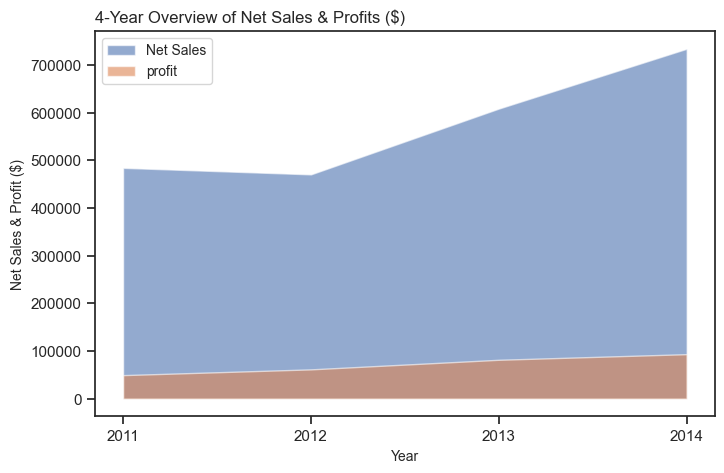

In [26]:
# plot 
sns.set_style("white")
sns.set_theme(style="ticks")
plt.figure(figsize=(8, 5))  #plot size
plt.title("4-Year Overview of Net Sales & Profits ($) ", fontsize=12, loc='left') #plot title

plt.fill_between(df_pivot_table_sales_profit.index, df_pivot_table_sales_profit['Net Sales'], alpha=0.6, label='Net Sales' )  
plt.fill_between(df_pivot_table_sales_profit.index, df_pivot_table_sales_profit['profit'], alpha=0.6, label='profit')
plt.ylabel('Net Sales & Profit ($)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.xticks(df_pivot_table_sales_profit.index, ['2011', '2012', '2013', '2014'])

plt.legend(fontsize=10)

# Show the plot
plt.show()

In [27]:
# Stats:
# Revenue : new colum 
df_stores_cleaned['revenue'] = df_stores_cleaned['sales'] - df_stores_cleaned['profit']

In [28]:
df_stores_cleaned['year'] = pd.to_datetime(df_stores_cleaned['year'], format='%Y')
df_pivot_table_sales_profit = df_stores_cleaned.pivot_table(index=df_stores_cleaned['year'].dt.year, values=['sales', 'profit','discount'], aggfunc='sum')
df_pivot_table_sales_profit.rename(columns={"sales": "Net Sales"}, inplace=True)
df_pivot_table_sales_profit


,discount,profit,Net Sales
year,,,
2011,315.46,49543.9741,484255
2012,327.09,61618.6037,470560
2013,399.12,81726.9308,608523
2014,519.42,93507.5131,734016


In [29]:
#create the (Gross) Price Column!
df_stores_cleaned['gross_price'] = (df_stores_cleaned['revenue'] - df_stores_cleaned['profit']) / df_stores_cleaned['quantity']

In [30]:
df_stores_cleaned['net_price'] = df_stores_cleaned['gross_price'] - (df_stores_cleaned['gross_price'] * df_stores_cleaned['discount'])

In [31]:
df_stores_cleaned.head(3)

,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,product_name,sales,quantity,discount,profit,market,market2,revenue,gross_price,net_price
0,LS-172304,Lycoris Saunders,36624,CA-2011-130813,2011-01-07,High,2011-01-01,2,2011-01-09,Second Class,...,Xerox 225,19,3,0.0,9.3312,US,North America,9.6688,0.112533,0.112533
1,MV-174854,Mark Van Huff,37033,CA-2011-148614,2011-01-21,Medium,2011-01-01,4,2011-01-26,Standard Class,...,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.0,9.2928,US,North America,9.7072,0.207200,0.207200
2,CS-121304,Chad Sievert,31468,CA-2011-118962,2011-08-05,Medium,2011-01-01,32,2011-08-09,Standard Class,...,"Adams Phone Message Book, Professional, 400 Me...",21,3,0.0,9.8418,US,North America,11.1582,0.438800,0.438800


In [32]:
def quarterly_bins(df_stores_cleaned):
    quarters = []   
    for weeknum in df_stores_cleaned['weeknum']:
        if weeknum <= 13:
            quarters.append('Q1')
        elif weeknum <= 26:
            quarters.append('Q2')
        elif weeknum <= 39:
            quarters.append('Q3')
        else:
            quarters.append('Q4')
    return quarters


df_stores_cleaned['quarter'] = quarterly_bins(df_stores_cleaned)


In [33]:
df_stores_cleaned.head(3)

,customer_id,customer_name,row_id,order_id,order_date,order_priority,year,weeknum,ship_date,ship_mode,...,sales,quantity,discount,profit,market,market2,revenue,gross_price,net_price,quarter
0,LS-172304,Lycoris Saunders,36624,CA-2011-130813,2011-01-07,High,2011-01-01,2,2011-01-09,Second Class,...,19,3,0.0,9.3312,US,North America,9.6688,0.112533,0.112533,Q1
1,MV-174854,Mark Van Huff,37033,CA-2011-148614,2011-01-21,Medium,2011-01-01,4,2011-01-26,Standard Class,...,19,2,0.0,9.2928,US,North America,9.7072,0.207200,0.207200,Q1
2,CS-121304,Chad Sievert,31468,CA-2011-118962,2011-08-05,Medium,2011-01-01,32,2011-08-09,Standard Class,...,21,3,0.0,9.8418,US,North America,11.1582,0.438800,0.438800,Q3


In [34]:
df_aggregate = df_stores_cleaned.groupby([df_stores_cleaned['year'].dt.year, 'quarter']).agg({
    'sales': 'sum',
    'discount': 'sum',
    'order_id': 'nunique',
    
}).reset_index().rename(columns={'sales': 'Net Sales', 'discount': 'Discount', 'order_id': 'No_of_orders'})

# Check the resulting DataFrame
print(df_aggregate.head())

   year quarter  Net Sales  Discount  No_of_orders
0  2011      Q1      68599     38.95           116
1  2011      Q2      89338     58.77           205
2  2011      Q3     134494     82.55           252
3  2011      Q4     191824    135.19           396
4  2012      Q1      68858     37.96           144


C:\Users\hajar\AppData\Local\Temp\ipykernel_31656\1619733932.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['2011', '2012', '2013', '2014'])  # Set xtick labels


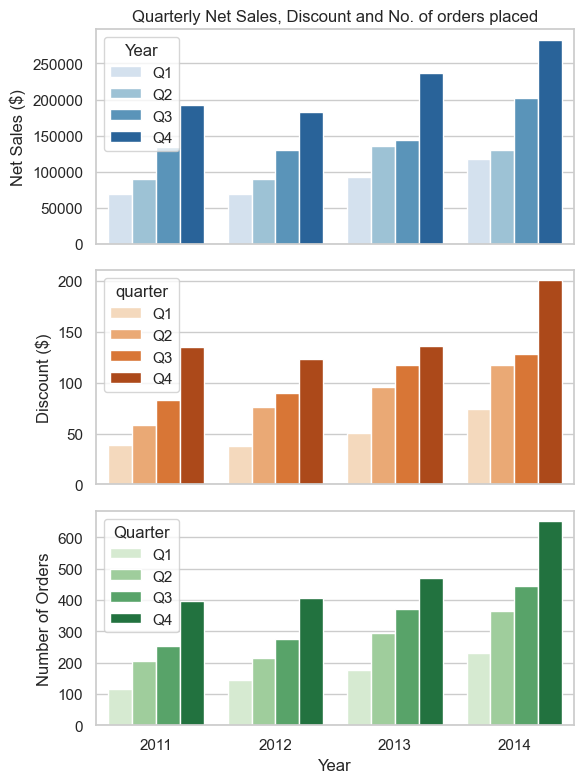

In [35]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8), sharex=True)

# Plot Net Sales
sns.barplot(data=df_aggregate, x="year", y="Net Sales", hue="quarter", palette="Blues", ax=axes[0])
axes[0].set_title("Quarterly Net Sales, Discount and No. of orders placed")
axes[0].set_ylabel("Net Sales ($)")
axes[0].legend(title='Year', loc='upper left')

# Plot Discount
sns.barplot(data=df_aggregate, x="year", y="Discount", hue="quarter", palette="Oranges", ax=axes[1])
axes[1].set_ylabel("Discount ($)")


# Plot No of Orders
sns.barplot(data=df_aggregate, x="year", y="No_of_orders", hue="quarter", palette="Greens", ax=axes[2])
axes[2].set_ylabel("Number of Orders")
axes[2].set_xlabel("Year")
axes[2].set_xticklabels(['2011', '2012', '2013', '2014'])  # Set xtick labels
axes[2].legend(title='Quarter', loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
# Understanding the Product Slaes 

item_quantity = df_stores_cleaned.groupby([df_stores_cleaned['year'].dt.year,'category', 'sub_category']).agg({'quantity': 'sum', 'sales':'sum','profit':'sum'}).reset_index()
item_quantity.rename(columns={'quantity': 'Item_quantity', 'sales':'Sales','profit':'Profit' }, inplace=True)
display(item_quantity)


,year,category,sub_category,Item_quantity,Sales,Profit
0,2011,Furniture,Bookcases,153,20037,-346.1707
1,2011,Furniture,Chairs,540,77239,6955.0470
2,2011,Furniture,Furnishings,660,13821,1972.8919
3,2011,Furniture,Tables,270,46091,-3124.0427
4,2011,Office Supplies,Appliances,314,15316,2459.4999
...,...,...,...,...,...,...
63,2014,Office Supplies,Supplies,192,16051,-955.3128
64,2014,Technology,Accessories,1079,59956,15672.3570
65,2014,Technology,Copiers,73,62900,25031.7902
66,2014,Technology,Machines,121,43546,-2869.2156


In [37]:
#pivot table to summarize

df_pivot_products = item_quantity.pivot_table(index=['year', 'category'], values=['Item_quantity','Sales','Profit'], aggfunc='sum')
df_pivot_products.head(20)


Item_quantity      Profit   Sales
year category                                          
2011 Furniture                 1623   5457.7255  157188
     Office Supplies           4569  22593.4161  151782
     Technology                1389  21492.8325  175285
2012 Furniture                 1775   3015.2029  170518
     Office Supplies           4715  25099.5338  137248
     Technology                1489  33503.8670  162794
2013 Furniture                 2193   6959.9531  198910
     Office Supplies           5922  35015.6639  183531
     Technology                1695  39751.3138  226082
2014 Furniture                 2437   3018.3913  215390
     Office Supplies           7700  39782.1870  246566
     Technology                2366  50706.9348  272060

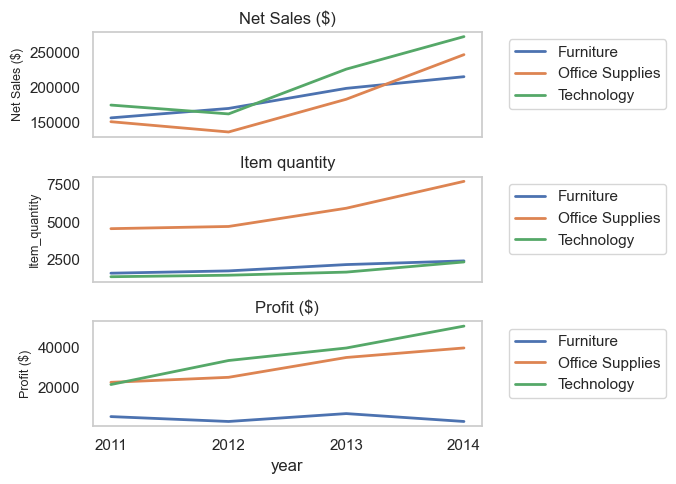

In [38]:
#plot
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)

# Plot Net Sales
sns.lineplot(data=df_pivot_products, x="year", y="Sales", hue="category",  ax=axes[0], linewidth=2.0)
axes[0].set_ylabel("Net Sales ($)", size = 9)
axes[0].set_xlabel("Year")
axes[0].set_title("Net Sales ($)" , size = 12)
axes[0].grid(False)  # Remove gridlines
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Item_quantity
sns.lineplot(data=df_pivot_products, x="year", y="Item_quantity", hue="category", ax=axes[1], linewidth=2.0)
axes[1].set_ylabel("Item_quantity", size = 9)
axes[1].set_title("Item quantity" , size = 12)
axes[1].grid(False)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Plot Profit
sns.lineplot(data=df_pivot_products, x="year", y="Profit", hue="category", ax=axes[2], linewidth=2.0)
axes[2].set_ylabel("Profit ($)", size = 9)
axes[2].set_title("Profit ($)" , size = 12)
axes[2].set_xticks([2011, 2012, 2013, 2014])
axes[2].grid(False)
# layout for spacing
plt.tight_layout()
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [39]:
# Customer Segmentation:

customer_segment = df_stores_cleaned.groupby([df_stores_cleaned['year'].dt.year,'segment']).agg({'order_id': 'nunique', 'revenue':'sum','profit':'sum', 'customer_name': 'nunique'}).reset_index()
customer_segment.rename(columns={'order_id': 'Number_of_orders', 'revenue':'Total Revenue','profit':'Profit', 'customer_name':'Number_of_customers' }, inplace=True)
customer_segment['Average_order_value'] = (customer_segment['Total Revenue'] / customer_segment['Number_of_orders']).apply(np.ceil)
customer_segment['Profit'] = customer_segment['Profit'].apply(np.ceil)
display(customer_segment)

,year,segment,Number_of_orders,Total Revenue,Profit,Number_of_customers,Average_order_value
0,2011,Consumer,524,241785.1496,24320.0,311,462.0
1,2011,Corporate,287,114925.7231,13514.0,179,401.0
2,2011,Home Office,158,78000.1532,11711.0,105,494.0
3,2012,Consumer,535,238098.8335,28461.0,295,446.0
4,2012,Corporate,312,108071.6752,20689.0,165,347.0
5,2012,Home Office,191,62770.8876,12471.0,113,329.0
6,2013,Consumer,647,260568.7306,35759.0,330,403.0
7,2013,Corporate,421,176016.3907,30940.0,194,419.0
8,2013,Home Office,242,90210.9479,15030.0,113,373.0
9,2014,Consumer,880,286925.0771,45581.0,361,327.0


In [40]:
# Pivot table

df_customerseg = customer_segment.pivot_table(index=['year', 'segment'], values=['Number_of_customers','Number_of_orders', 'Average_order_value', 'Profit'], aggfunc='sum')
df_customerseg.head()

Average_order_value  Number_of_customers  Number_of_orders  \
year segment                                                                   
2011 Consumer                   462.0                  311               524   
     Corporate                  401.0                  179               287   
     Home Office                494.0                  105               158   
2012 Consumer                   446.0                  295               535   
     Corporate                  347.0                  165               312   

                   Profit  
year segment               
2011 Consumer     24320.0  
     Corporate    13514.0  
     Home Office  11711.0  
2012 Consumer     28461.0  
     Corporate    20689.0

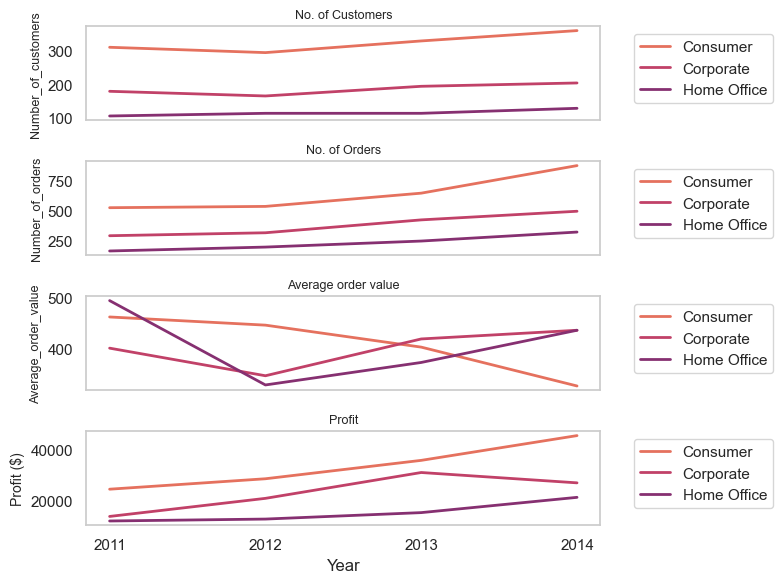

In [41]:
#plot
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 6), sharex=True)
                                                   
# Plot Number_of_customers
sns.lineplot(data=df_customerseg, x="year", y="Number_of_customers", hue="segment",  ax=axes[0], linewidth=2.0, palette="flare", sizes=(.25, 1.5))
axes[0].set_title ("No. of Customers", size = 9)
axes[0].set_ylabel("Number_of_customers", size = 9)
axes[0].set_xlabel("Year")
axes[0].grid(False)  # Remove gridlines
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Number_of_orders	
sns.lineplot(data=df_customerseg, x="year", y="Number_of_orders", hue="segment", ax=axes[1], linewidth=2.0, palette="flare")
axes[1].set_title ("No. of Orders", size = 9)
axes[1].set_ylabel("Number_of_orders", size = 9)
axes[1].grid(False)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Average_order_value
sns.lineplot(data=df_customerseg, x="year", y="Average_order_value", hue="segment", ax=axes[2], linewidth=2.0, palette="flare")
axes[2].set_title ("Average order value", size = 9)
axes[2].set_ylabel("Average_order_value", size = 9)
axes[2].set_xticks([2011, 2012, 2013, 2014])
axes[2].grid(False)
# layout for spacing
plt.tight_layout()
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Profit
sns.lineplot(data=df_customerseg, x="year", y="Profit", hue="segment", ax=axes[3], linewidth=2.0, palette="flare")
axes[3].set_title ("Profit", size = 9)
axes[3].set_ylabel("Profit ($)", size = 10
                  )
axes[3].set_xticks([2011, 2012, 2013, 2014])
axes[3].set_xlabel("Year")
axes[3].grid(False)
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# layout for spacing
plt.tight_layout()


plt.show()

Distribution between new & returning customers


In [42]:
customer_info = df_stores_cleaned.groupby([df_stores_cleaned['year'].dt.year,'customer_id']).agg({'order_id': 'nunique'}).reset_index()
customer_info['Type_of_customer'] = customer_info['order_id'].apply(lambda x: "New customer" if x == 1 else "Returning customer")
customer_info


,year,customer_id,order_id,Type_of_customer
0,2011,AA-103154,2,Returning customer
1,2011,AA-103754,2,Returning customer
2,2011,AA-104804,1,New customer
3,2011,AA-106454,2,Returning customer
4,2011,AB-100154,2,Returning customer
...,...,...,...,...
2493,2014,XP-218654,4,Returning customer
2494,2014,YC-218954,1,New customer
2495,2014,YS-218804,5,Returning customer
2496,2014,ZC-219104,4,Returning customer


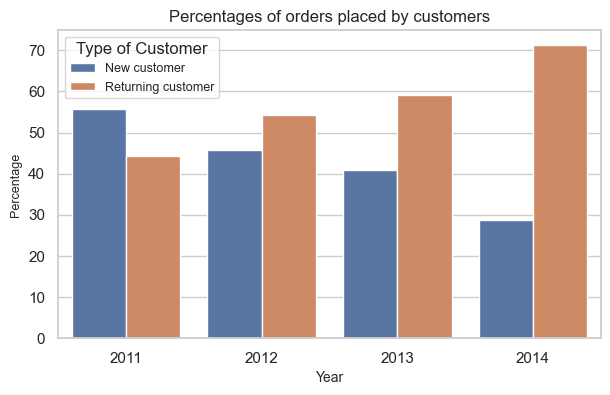

In [43]:
counts = customer_info.groupby(['year', 'Type_of_customer']).size().unstack(fill_value=0)


counts = customer_info.groupby(['year', 'Type_of_customer']).size().unstack(fill_value=0)


percentages = counts.div(counts.sum(axis=1), axis=0) * 100


percentages = percentages.reset_index().melt(id_vars='year', var_name='Type_of_customer', value_name='Percentage')

plt.figure(figsize=(7, 4))
sns.barplot(x='year', y='Percentage', hue='Type_of_customer', data=percentages, )
plt.title('Percentages of orders placed by customers')
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Percentage', fontsize = 9)
plt.legend(title='Type of Customer', fontsize = 9)
plt.show()

Understanding : Sales and profit across customers 

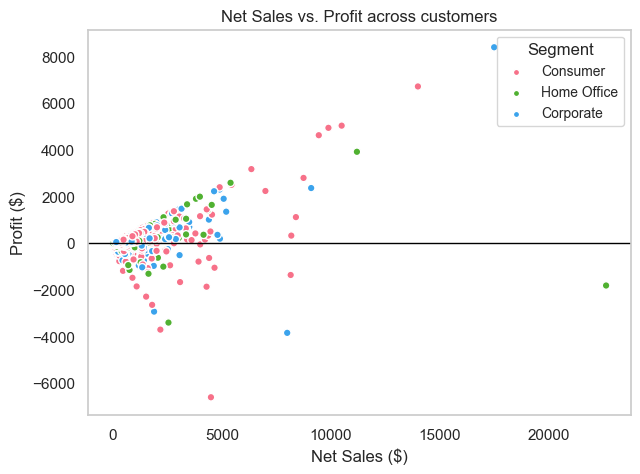

In [44]:
Profit = df_stores_cleaned['profit']
Sales = df_stores_cleaned['sales']
Segment = df_stores_cleaned['segment']


sns.set_theme(style="whitegrid")
unique_segments = Segment.unique()
palette = sns.color_palette("husl", len(unique_segments))
segment_colors = {segment: palette[i] for i, segment in enumerate(unique_segments)}
colors = Segment.map(segment_colors)

plt.figure(figsize=(7, 5))
plt.scatter(
    x=Sales,
    y=Profit,
    c=colors,
    marker="o",  
    edgecolor='w',  
    s=30  
)


plt.grid(False)

plt.axhline(y=0, color='black', linewidth=1)

for segment, color in segment_colors.items():
    plt.scatter([], [], c=[color], label=segment, edgecolor='w', s=20, marker='o')

plt.title('Net Sales vs. Profit across customers')
plt.xlabel('Net Sales ($)', fontsize = 12)
plt.ylabel('Profit ($)', fontsize = 12)
plt.legend(title='Segment', fontsize = 10)
plt.show()

Understanding Profit-Sales across Products sub_categories

In [47]:
# Pivot table

df_category = item_quantity.pivot_table(index=['category', 'sub_category'], values=['Sales','Profit'], aggfunc='sum')
df_category.head(15)

Profit   Sales
category        sub_category                    
Furniture       Bookcases     -3472.5560  114879
                Chairs        26590.1663  328454
                Furnishings   13059.1436   91705
                Tables       -17725.4811  206968
Office Supplies Appliances    18138.0054  107538
                Art            6527.7870   27137
                Binders       30221.7633  203428
                Envelopes      6964.1767   16477
                Fasteners       949.5182    3024
                Labels         5546.2540   12507
                Paper         34053.5693   78475
                Storage       21278.8264  223862
                Supplies      -1189.0995   46679
Technology      Accessories   41936.6357  167401
                Copiers       55617.8249  149530

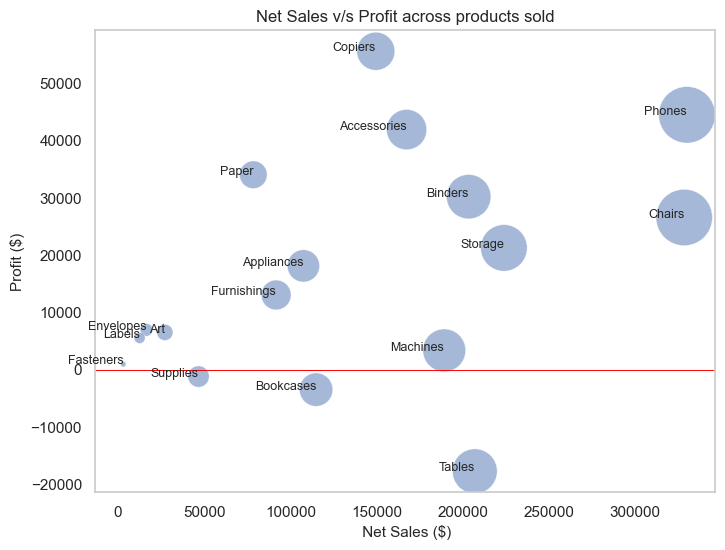

In [48]:
df_category = df_category.pivot_table(index=['category', 'sub_category'], values=['Sales', 'Profit'], aggfunc='sum')

plt.figure(figsize=(8, 6))
bubble = plt.scatter(df_category['Sales'], df_category['Profit'], s=df_category['Sales']*0.005, alpha=0.5, c='b', edgecolors='w', linewidth=0.5, marker='o')

for (cat, sub_cat), row in df_category.iterrows():
    plt.text(row['Sales'], row['Profit'], sub_cat, fontsize=9, ha='right')

plt.title('Net Sales v/s Profit across products sold')
plt.xlabel(' Net Sales ($)', size = 11)
plt.ylabel('Profit ($)', size = 11)
plt.grid(False)
plt.axhline(y=0, color='red', linewidth=0.7)
plt.show()
